<a href="https://colab.research.google.com/github/satyajitpatil2002/mental_health_Project/blob/main/code_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HYPERPARAMETER TUNING


>lr 0.835 (0.036)
>knn 0.948 (0.019)
>cart 0.687 (0.043)
>svm 0.941 (0.019)
>bayes 0.824 (0.035)
>stacking 0.973 (0.014)


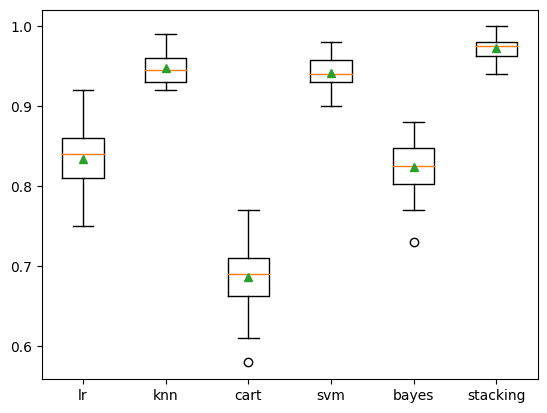

Accuracy on the test set: 96.33333333333334
Precision: 0.9683544303797469
Recall: 0.9622641509433962
F1 Score: 0.9652996845425867


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pyswarm import pso

# Read the dataset
data = pd.read_csv("/content/labelleddata01.csv")
df = pd.DataFrame(data)

# Function to get the dataset
def get_dataset(df):
    X, y = make_classification(n_samples=1000, n_features=66, n_informative=45, n_redundant=15, random_state=1)
    return X, y

# Function to get the stacking ensemble of models
def get_stacking():
    # Define the base models with specified parameters
    base_models = {
        'lr': LogisticRegression(max_iter=10000, C=1.0, solver='lbfgs'),
        'knn': KNeighborsClassifier(n_neighbors=5),
        'cart': DecisionTreeClassifier(max_depth=None, min_samples_split=2),
        'svm': SVC(kernel='rbf', C=1.0, gamma='scale'),
        'bayes': GaussianNB()
    }
    # Define the meta learner model
    level1 = SVC(kernel='rbf', C=1.0, gamma='scale')
    # Define the stacking ensemble
    model = StackingClassifier(estimators=list(base_models.items()), final_estimator=level1, cv=5)
    return model

# Function to get a list of models to evaluate
def get_models():
    models = {
        'lr': LogisticRegression(max_iter=10000, C=1.0, solver='lbfgs'),
        'knn': KNeighborsClassifier(n_neighbors=5),
        'cart': DecisionTreeClassifier(max_depth=None, min_samples_split=2),
        'svm': SVC(kernel='rbf', C=1.0, gamma='scale'),
        'bayes': GaussianNB(),
        'stacking': get_stacking()
    }
    return models

# Function to evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Define dataset
X, y = get_dataset(df)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = [], []
for name, model in models.items():
    scores = evaluate_model(model, X_scaled, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# Plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Select the best-performing model (in this case, let's assume it's the stacking classifier)
best_model = get_models()['stacking']

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy*100)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=3e7518d7bbfc4f39457e623a98e905c95b1ac4b419c0e19be81ab3f48951cf59
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


>lr 0.835 (0.037)
>knn 0.836 (0.039)
>cart 0.693 (0.044)
>svm 0.907 (0.027)
>bayes 0.824 (0.035)
>stacking 0.904 (0.026)


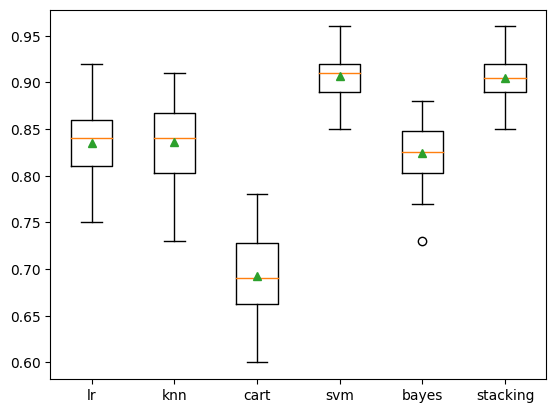

Stopping search: maximum iterations reached --> 100
Accuracy on the test set: 96.0


In [ ]:

# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from pyswarm import pso

data = pd.read_csv("/content/labelleddata01.csv")
df = pd.DataFrame(data)


# get the dataset
def get_dataset(df):
    X, y = make_classification(n_samples=1000, n_features=66, n_informative=45, n_redundant=15, random_state=1)
    return X, y

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = SVC()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(max_iter=10000)
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset(df)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the objective function for PSO
def objective_function(params):
    C, gamma = params
    model = SVC(C=C, gamma=gamma)
    return -np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))

# Define the parameter bounds for PSO
lb = [1e-6, 1e-6]
ub = [1e+6, 1e+1]

# Perform PSO for hyperparameter tuning
best_params, stats= pso(objective_function, lb, ub)

# Select the best-performing model (in this case, let's assume it's the stacking classifier)
best_model = get_models()['stacking']
best_model.final_estimator.set_params(C=best_params[0], gamma=best_params[1])

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy*100)


In [ ]:
pso_result = best_params, stats
# Check if 'gbest_curve' is a key in the stats dictionary
# Check if the return value is a tuple with two elements
if isinstance(pso_result, tuple) and len(pso_result) == 2:
    best_params, stats = pso_result
    # Check if 'gbest_curve' is a key in the stats dictionary
    if isinstance(stats, dict) and 'gbest_curve' in stats:
        # Plot the convergence curve
        iterations = np.arange(len(stats['gbest_curve']))
        plt.figure(figsize=(10, 6))
        plt.plot(iterations, stats['gbest_curve'])
        plt.xlabel('Iterations')
        plt.ylabel('Best Fitness')
        plt.title('Convergence Curve')
        plt.show()
    else:
        print("The 'gbest_curve' key is not present in the stats dictionary, or stats is not a dictionary.")
else:
    print("The pso function did not return the expected output (a tuple with two elements).")

The 'gbest_curve' key is not present in the stats dictionary, or stats is not a dictionary.


In [ ]:
print("Best Parameters found by PSO:")
print(best_params)


Best Parameters found by PSO:
[7.77535460e+05 1.96883453e-02]


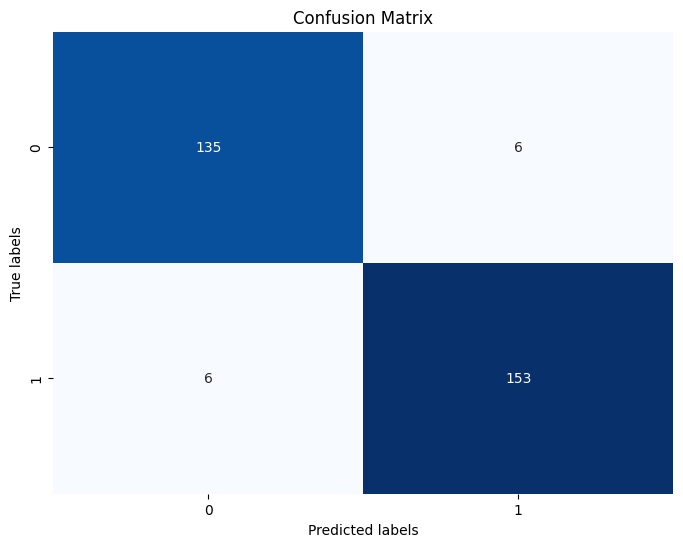

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9620253164556962
Recall: 0.9559748427672956
F1 Score: 0.9589905362776026
